In [219]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as mp
import seaborn as c
import warnings
warnings.filterwarnings('ignore')

In [220]:
df = pd.read_csv('C:/Users/Vivek negi/Downloads/Cleaned_Car_data.csv')

In [221]:
df.head()

,Unnamed: 0,name,company,year,Price,kms_driven,fuel_type
0,0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,4,Ford Figo,Ford,2012,175000,41000,Diesel


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  816 non-null    int64 
 1   name        816 non-null    object
 2   company     816 non-null    object
 3   year        816 non-null    int64 
 4   Price       816 non-null    int64 
 5   kms_driven  816 non-null    int64 
 6   fuel_type   816 non-null    object
dtypes: int64(4), object(3)
memory usage: 44.8+ KB


In [223]:
df.drop(columns='Unnamed: 0',inplace=True)

In [224]:
df.describe()

,year,Price,kms_driven
count,816.000000,8.160000e+02,816.000000
mean,2012.444853,4.117176e+05,46275.531863
std,4.002992,4.751844e+05,34297.428044
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.912500e+05,56818.500000
max,2019.000000,8.500003e+06,400000.000000


In [225]:
backup_file = df.copy()

In [226]:
df['name'] = df['name'].str.split().str.slice(start = 0, stop = 3).str.join(' ')

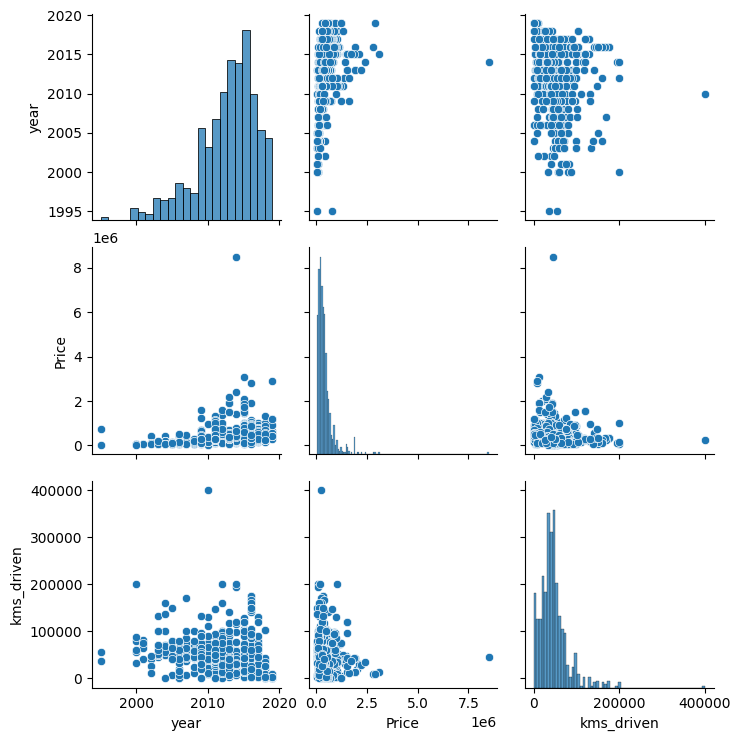

In [227]:
c.pairplot(df)

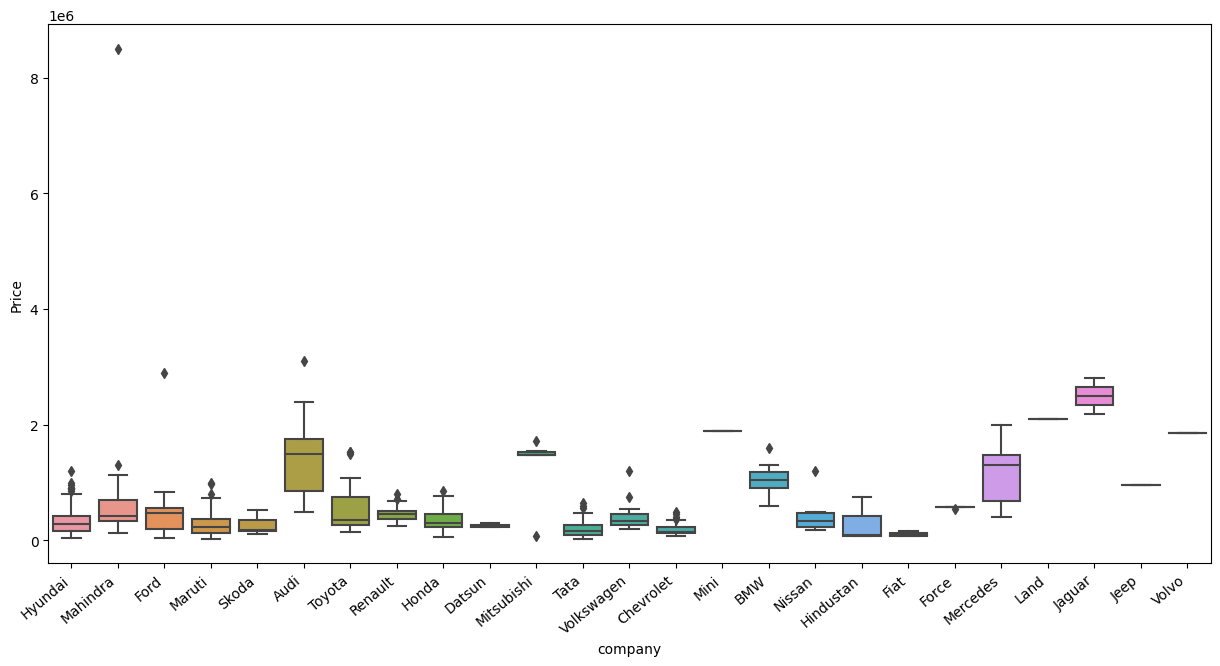

In [228]:
mp.subplots(figsize = (15,7))
ax = c.boxplot(x='company',y='Price',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha ='right')
mp.show()

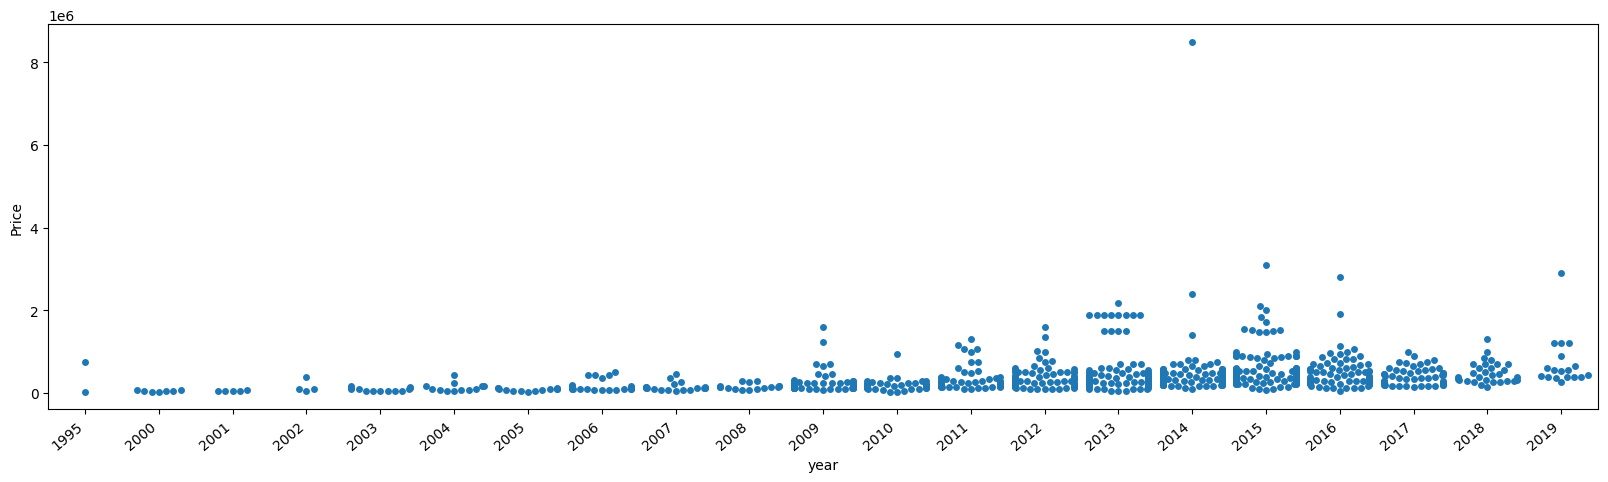

In [229]:
mp.subplots(figsize = (20,5))
ax = c.swarmplot(x='year',y='Price',data = df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha ='right')
mp.show()

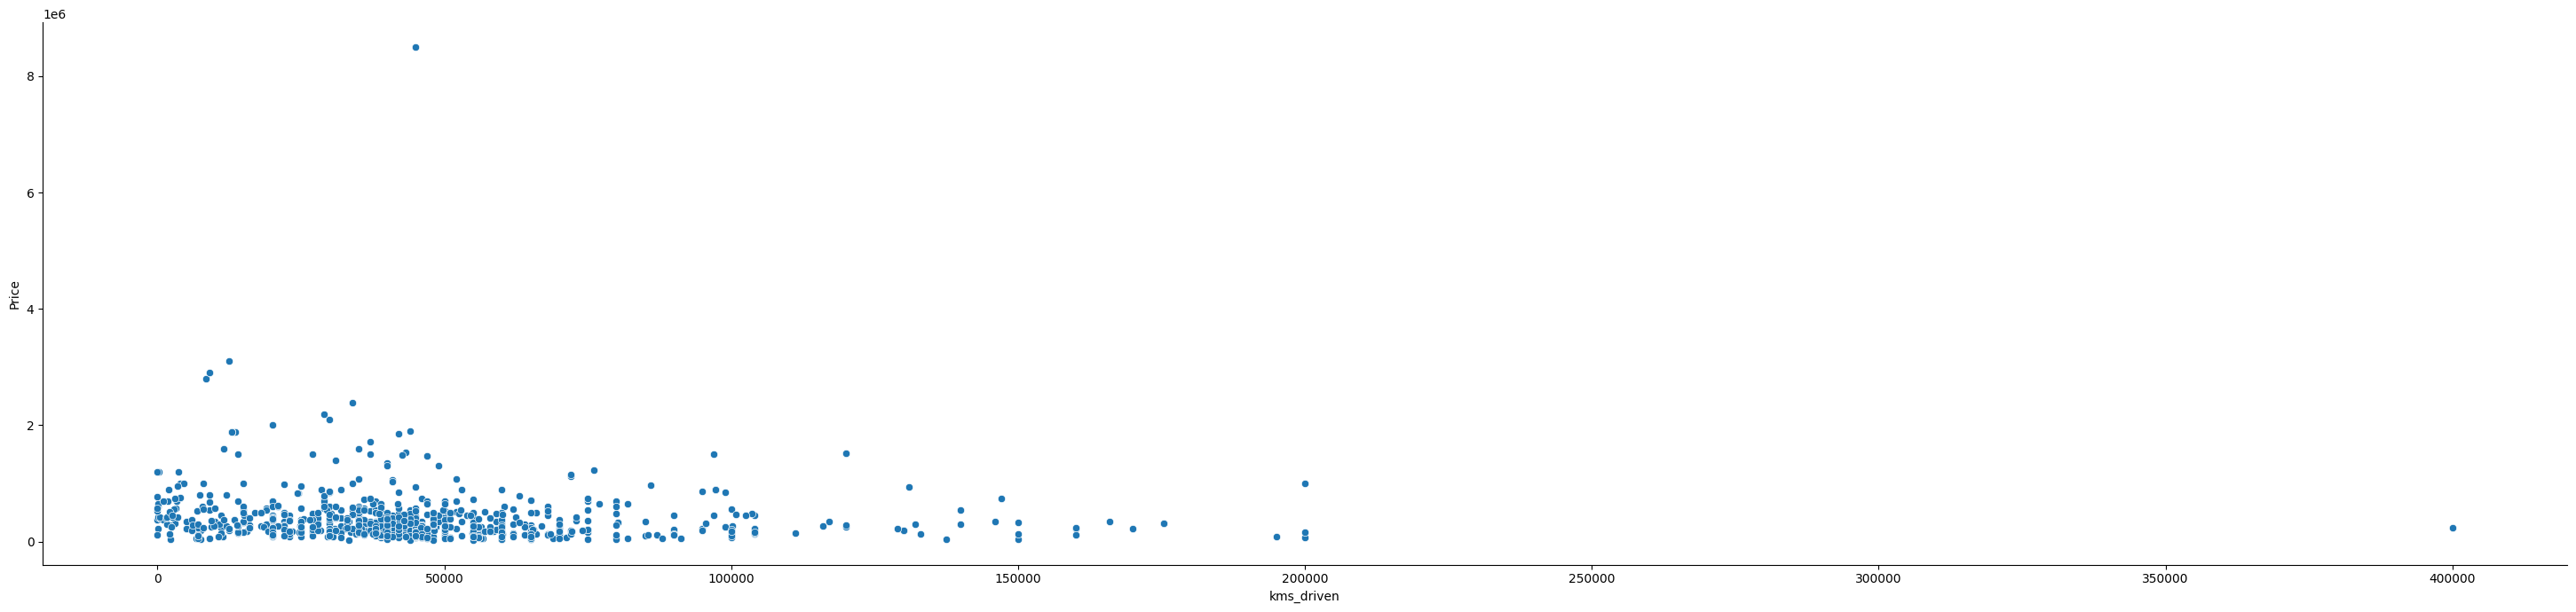

In [230]:
c.relplot(x='kms_driven',y='Price',data=df ,height=7,aspect=4.16)

<AxesSubplot: xlabel='fuel_type', ylabel='Price'>

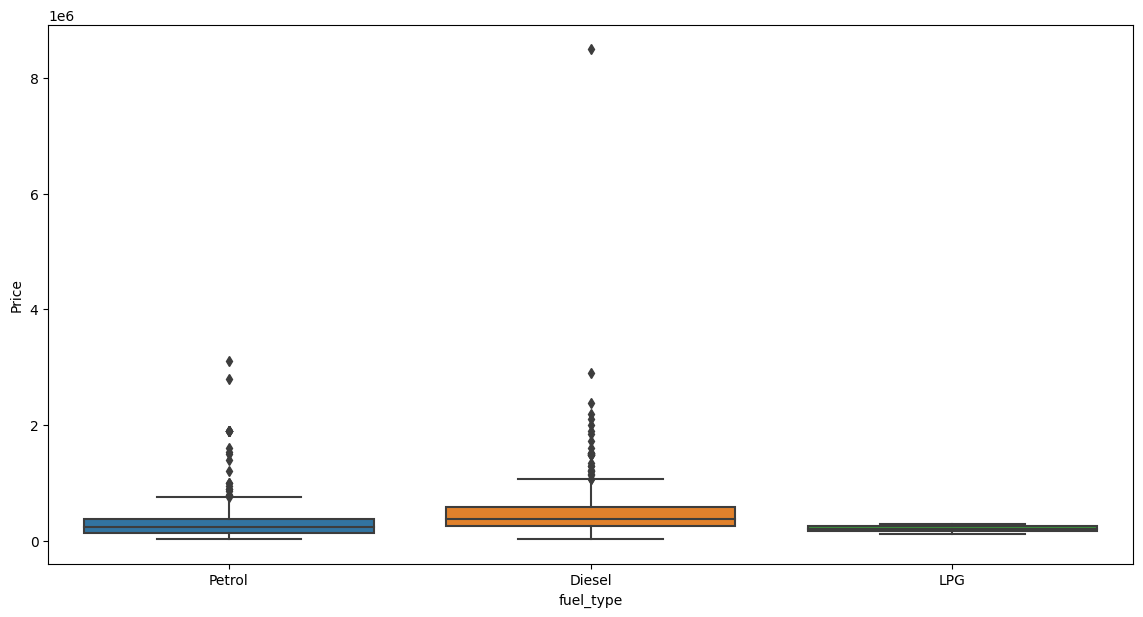

In [231]:
mp.subplots(figsize=(14,7))
c.boxplot(x='fuel_type',y='Price',data=df)

<AxesSubplot: >

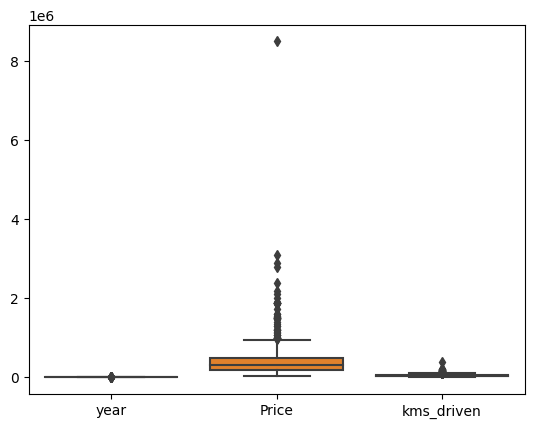

In [232]:
c.boxplot(data= df)

In [233]:
row = ['kms_driven','Price','year']
for column in row:
    upper_b = df[column].mean() + 3*df[column].std()
    lower_b = df[column].mean() -3*df[column].std()
    df=df[df[column]<upper_b]
    df=df[df[column]>lower_b]

In [234]:
x=df[['company','year','kms_driven','fuel_type']]
y=df['Price']

# MACHINE LEARNING

In [235]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [236]:
ohe=OneHotEncoder()
ohe.fit(x[['company','fuel_type']])

OneHotEncoder()

In [237]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['company','fuel_type']),remainder='passthrough')

In [238]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=101)

In [239]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [240]:
pipe=make_pipeline(column_trans,lr)
pipe.fit(x_train,y_train)
y_pred=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.44905028988217977

In [241]:
pd.DataFrame({ 'actual' : y_test, 'predicted' : y_pred, 'diffrence' : (y_test - y_pred)}).head()

,actual,predicted,diffrence
562,230000,375247.506645,-145247.506645
248,255000,327807.334998,-72807.334998
42,284999,465978.413472,-180979.413472
718,71000,57774.729439,13225.270561
576,170000,171701.429056,-1701.429056


In [242]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor()
pipe=make_pipeline(column_trans,dtc)
pipe.fit(x_train,y_train)
y_pred_dtc=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.44905028988217977

In [243]:
pd.DataFrame({ 'actual' : y_test, 'predicted' : y_pred_dtc, 'diffrence' : (y_test - y_pred_dtc)}).head()

,actual,predicted,diffrence
562,230000,173333.333333,56666.666667
248,255000,370000.000000,-115000.000000
42,284999,284999.000000,0.000000
718,71000,115000.000000,-44000.000000
576,170000,250000.000000,-80000.000000


In [244]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
pipe=make_pipeline(column_trans,dtc)
pipe.fit(x_train,y_train)
y_pred_clf=pipe.predict(x_test)
r2_score(y_test,y_pred)

0.44905028988217977

In [245]:
pd.DataFrame({ 'actual' : y_test, 'predicted' : y_pred_clf, 'diffrence' : (y_test - y_pred_clf)}).head()

,actual,predicted,diffrence
562,230000,173333.333333,56666.666667
248,255000,370000.000000,-115000.000000
42,284999,284999.000000,0.000000
718,71000,115000.000000,-44000.000000
576,170000,250000.000000,-80000.000000
